# Data management

### Introduction to Text Data

## [Malka Guillot](https://malkaguillot.github.io/)

### HEC Liège | [ECON2306]()

This notebook provides an introduction to the basic tools for text analytics.

### Set up environment

In [1]:
#!pip install unidecode
#!pip install googletrans
#!pip install gensim
#!pip install spacy
#!pip install wordcloud
#!pip install pyldavis

#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Set up the data

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents.

In [4]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups() # object is a dictionary
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Data Set Characteristics:

In [5]:
#print(data['DESCR'])

In [6]:
W, y = data.data, data.target
n_samples = y.shape[0]
n_samples

11314

In [7]:
y[:10] # news story categories

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

`W` is  list of documents:

In [8]:
doc = W[0]
doc

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

**Make a pandas dataframe**

In [9]:
df = pd.DataFrame(W,columns=['text'])
df['topic'] = y
df.head()

text  topic
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14

## Dictionary Methods

### Sentiment Analysis

In [10]:
#!pip install nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Import the lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Example
sentence = "VADER is pretty good at identifying the underlying sentiment of a text!"
print(sent_analyzer.polarity_scores(sentence))

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.75}


In [12]:
# Dictionary-Based Sentiment Analysis

sid = SentimentIntensityAnalyzer()
polarity = sid.polarity_scores(doc)
print(polarity)

{'neg': 0.012, 'neu': 0.916, 'pos': 0.072, 'compound': 0.807}


In [13]:
doc

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

The text transformation is often applied to a dataframe column:

In [14]:
# sample 20% of the dataset
dfs = df.sample(frac=.2)

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['text'].apply(get_sentiment)

In [15]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[60:150] for x  in dfs[-5:]['text']]

['CLINTON: AM Press Briefing by Dee Dee Myers -- 4.15.93\nOrganization: Project GNU, Free Sof',
 ' Newsletter, Part 2/4\nReply-To: david@stat.com (David Dodell)\nDistribution: world\nOrganiza',
 "CLINTON: President's Remarks at Town Hall Meeting\nOrganization: MIT Artificial Intelligenc",
 'Final Public Dragon Magazine Update (Last chance for public bids)\nKeywords: Dragon Magazin',
 'CLINTON: Background BRiefing in Vancouver 4.4.93\nOrganization: Project GNU, Free Software ']

In [16]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['text']]

['OSE OF FALKLANDS WAR\nOrganization: University of Wisconsin Eau Claire\nLines: 918\n\n\n\nSECRET PURPOSE O',
 'ct: Re: Need info on 43:1 and suicide for refutation\nOrganization: Ideology Busters, Inc.\nDistributi',
 'ews in LATVIA - some documents\nArticle-I.D.: zuma.9304052018\nReply-To: sera@zuma.UUCP (Serdar Argic)',
 ': Accounts of Anti-Armenian Human Rights Violations in Azerbaijan #013\nSummary: Prelude to Current E',
 'year the Turkish Nation is mourning and praying again for...\nReply-To: sera@zuma.UUCP (Serdar Argic)']

### Dictionary specific to a corpus
Counting sets of words or phrases across documents


In [17]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 1357),
 ('of', 645),
 ('to', 578),
 ('and', 548),
 ('a', 532),
 ('in', 427),
 ('i', 370),
 ('is', 360),
 ('that', 300),
 ('for', 250),
 ('it', 193),
 ('on', 189),
 ('you', 173),
 ('have', 161),
 ('be', 158),
 ('-', 156),
 ('with', 156),
 ('this', 148),
 ('are', 142),
 ('>', 140)]

### Removing words from a curpus vocabulary: StopWords

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Print the first 10 stopwords
list(stopwords)[:10]

['our', 'an', 'at', 'your', 'what', "you'll", 'into', "wasn't", 'be', 'have']

In [20]:
stopwords = set([x for x in stopwords if x != 'against']) # add an exception

In [21]:
stopfreq = np.sum([freqs[x] for x in stopwords]) #
stopfreq

10481

In [22]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

18320

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [23]:
import re

docs = dfs[:5]['text']

# Extract words after Subject.
for doc in docs:
    print(re.findall(r'Subject: \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Subject: SECRET ']
['Subject: Gun ']
[]
['Subject: Accounts ']
['Subject: This ']


In [24]:
# Extract hyphenated words
for doc in docs:
    print(re.findall(r'[a-z]+-[a-z]+',
                     doc,
                     re.IGNORECASE))

['IN-VISIBILITY', 'wind-swept', 'so-called', 'longer-range', 'so-called', 'two-thirds', 'semi-permanent', 'far-off', 'so-called', 'fast-approaching', 'so-called', 'up-to', 'anti-Bolshevik', 'long-range', 'two-prong', 'Rockefeller-controlled', 'full-fledged', 'all-out', 'so-called', 'then-President', 'over-all', 'so-called', 'particle-beam', 'man-made', 'then-Secretary', 'newly-launched', 'nuclear-powered', 'so-called', 'war-planes', 'Stealth-field', 'three-phase', 'war-room', 'all-out', 'anti-Bolshevik', 'anti-Bolshevik', 'so-called', 'slow-down', 'anti-Bolshevik', 'Rockefeller-Russian', 'mid-February', 'Bolshevik-controlled', 'long-standing', 'scrap-metal', 'work-site', 'year-old', 'long-standing', 'far-off', 'Rockefeller-Russian', 'high-speed', 'Rockefeller-Russian', 'Rockefeller-Russian', 'so-called', 'blast-proof', 'Rockefeller-Russian', 'mid-Atlantic', 'Rockefeller-Russian', 'hollowed-out', 'beam-weapon', 'Range-Finding', 'non-homing', 'non-nuclear', 'pseudo-smile', 'Rockefeller-R

In [25]:
# extract email addresses
for i, doc in enumerate(docs):
    finder = re.finditer('\w+@.+\.\w\w\w', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder:
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (6, 29) mcelwre@cnsvax.uwec.edu
0 (274, 291) eidetics@cerf.net
1 (6, 27) lvc@cbnews.cb.att.com
1 (11768, 11784) cipriani@att.com
2 (6, 19) sera@zuma.UUC
2 (121, 134) sera@zuma.UUC
2 (202, 249) 50D@unix.amherst.edu> nwbernst@unix.amherst.edu
3 (6, 25) dbd@urartu.sdpa.org
3 (21578, 21597) dbd@urartu.sdpa.org
4 (6, 19) sera@zuma.UUC
4 (121, 134) sera@zuma.UUC


In [26]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [27]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [28]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [29]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

In [30]:
df.uncertainty.mean()

0.00017677214071062401

In [31]:
df[df.uncertainty]

text  topic  uncertainty
2350  From: ld231782@longs.lance.colostate.edu (L. D...     11         True
4682  From: ld231782@longs.lance.colostate.edu (L. D...     11         True

## A standard tokenization pipeline


In [32]:
text = "Marie Curie was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in 2 scientific fields. Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first married couple to win the Nobel Prize and launching the Curie family legacy of 5 Nobel Prizes."

### 1. Pre-processing text

#### Removing capitalization, punctuation,  numbers

In [33]:
# Capitalization
text_lower = text.lower() # go to lower-case
text_lower

'marie curie was the first woman to win a nobel prize, the first person to win a nobel prize twice, and the only person to win a nobel prize in 2 scientific fields. her husband, pierre curie, was a co-winner of her first nobel prize, making them the first married couple to win the nobel prize and launching the curie family legacy of 5 nobel prizes.'

In [34]:
# Punctuation

# recipe for fast punctuation removal
from string import punctuation
punc_remover = str.maketrans('','',punctuation)
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

marie curie was the first woman to win a nobel prize the first person to win a nobel prize twice and the only person to win a nobel prize in 2 scientific fields her husband pierre curie was a cowinner of her first nobel prize making them the first married couple to win the nobel prize and launching the curie family legacy of 5 nobel prizes


#### Tokenization

In [35]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['marie', 'curie', 'was', 'the', 'first', 'woman', 'to', 'win', 'a', 'nobel', 'prize', 'the', 'first', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'twice', 'and', 'the', 'only', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'in', '2', 'scientific', 'fields', 'her', 'husband', 'pierre', 'curie', 'was', 'a', 'cowinner', 'of', 'her', 'first', 'nobel', 'prize', 'making', 'them', 'the', 'first', 'married', 'couple', 'to', 'win', 'the', 'nobel', 'prize', 'and', 'launching', 'the', 'curie', 'family', 'legacy', 'of', '5', 'nobel', 'prizes']


In [36]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#'
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['marie', 'curie', 'was', 'the', 'first', 'woman', 'to', 'win', 'a', 'nobel', 'prize', 'the', 'first', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'twice', 'and', 'the', 'only', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'in', 'scientific', 'fields', 'her', 'husband', 'pierre', 'curie', 'was', 'a', 'cowinner', 'of', 'her', 'first', 'nobel', 'prize', 'making', 'them', 'the', 'first', 'married', 'couple', 'to', 'win', 'the', 'nobel', 'prize', 'and', 'launching', 'the', 'curie', 'family', 'legacy', 'of', 'nobel', 'prizes']
['marie', 'curie', 'was', 'the', 'first', 'woman', 'to', 'win', 'a', 'nobel', 'prize', 'the', 'first', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'twice', 'and', 'the', 'only', 'person', 'to', 'win', 'a', 'nobel', 'prize', 'in', '#', 'scientific', 'fields', 'her', 'husband', 'pierre', 'curie', 'was', 'a', 'cowinner', 'of', 'her', 'first', 'nobel', 'prize', 'making', 'them', 'the', 'first', 'married', 'couple', 'to', 'win', 'the', 'nobel', 'prize', 'and', 'launch

In [37]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['marie', 'curie', 'first', 'woman', 'win', 'nobel', 'prize', 'first', 'person', 'win', 'nobel', 'prize', 'twice', 'person', 'win', 'nobel', 'prize', '#', 'scientific', 'fields', 'husband', 'pierre', 'curie', 'cowinner', 'first', 'nobel', 'prize', 'making', 'first', 'married', 'couple', 'win', 'nobel', 'prize', 'launching', 'curie', 'family', 'legacy', '#', 'nobel', 'prizes']


In [38]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [39]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:10]

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across']

#### Stemming & Lemmatizing

In [40]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in ['tax','taxes','taxed','taxation']]
print(tokens_stemmed)

['tax', 'tax', 'tax', 'taxat']


In [41]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [42]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
[wnl.lemmatize(c) for c in ['corporation', 'corporations', 'corporate']]

['corporation', 'corporation', 'corporate']

#### Pre-processing function (homemade)

In [43]:
from string import punctuation
translator = str.maketrans('','',punctuation)
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the corpus.

In [44]:
df['tokens_cleaned'] = df['text'].apply(normalize_text)
df['tokens_cleaned']

0        [lerxstwamumdedu, where, thing, subject, car, ...
1        [guykuocarsonuwashingtonedu, guy, kuo, subject...
2        [twillisececnpurdueedu, thoma, e, willi, subje...
3        [jgreenamb, joe, green, subject, weitek, p9000...
4        [jcmheadcfaharvardedu, jonathan, mcdowel, subj...
                               ...                        
11309    [jimzisfeinfactorycom, jim, zisfein, subject, ...
11310    [ebodinpearltuftsedu, subject, screen, death, ...
11311    [westesnetcomcom, est, subject, mount, cpu, co...
11312    [stevehcrlgw, steven, collin, subject, sphere,...
11313    [gunningccocaltechedu, kevin, j, gun, subject,...
Name: tokens_cleaned, Length: 11314, dtype: object

#### Pre-processing function (readymade)
**Shortcut: `gensim.simple_preprocess`.**

In [45]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['marie', 'curie', 'was', 'the', 'first', 'woman', 'to', 'win', 'nobel', 'prize', 'the', 'first', 'person', 'to', 'win', 'nobel', 'prize', 'twice', 'and', 'the', 'only', 'person', 'to', 'win', 'nobel', 'prize', 'in', 'scientific', 'fields', 'her', 'husband', 'pierre', 'curie', 'was', 'co', 'winner', 'of', 'her', 'first', 'nobel', 'prize', 'making', 'them', 'the', 'first', 'married', 'couple', 'to', 'win', 'the', 'nobel', 'prize', 'and', 'launching', 'the', 'curie', 'family', 'legacy', 'of', 'nobel', 'prizes']


In [46]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'the': 6, 'nobel': 6, 'prize': 5, 'first': 4, 'to': 4, 'win': 4, 'curie': 3, 'was': 2, 'person': 2, 'and': 2, 'her': 2, 'of': 2, 'marie': 1, 'woman': 1, 'twice': 1, 'only': 1, 'in': 1, 'scientific': 1, 'fields': 1, 'husband': 1, 'pierre': 1, 'co': 1, 'winner': 1, 'making': 1, 'them': 1, 'married': 1, 'couple': 1, 'launching': 1, 'family': 1, 'legacy': 1, 'prizes': 1})


Now let's `simple_preprocess` on the corpus.

In [47]:
df['tokens_simple'] = df['text'].apply(simple_preprocess)
df['tokens_simple']

0        [from, lerxst, wam, umd, edu, where, my, thing...
1        [from, guykuo, carson, washington, edu, guy, k...
2        [from, twillis, ec, ecn, purdue, edu, thomas, ...
3        [from, jgreen, amber, joe, green, subject, re,...
4        [from, jcm, head, cfa, harvard, edu, jonathan,...
                               ...                        
11309    [from, jim, zisfein, factory, com, jim, zisfei...
11310    [from, ebodin, pearl, tufts, edu, subject, scr...
11311    [from, westes, netcom, com, will, estes, subje...
11312    [from, steve, hcrlgw, steven, collins, subject...
11313    [from, gunning, cco, caltech, edu, kevin, gunn...
Name: tokens_simple, Length: 11314, dtype: object

### 2. Count and frequencies

In [48]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 6),
 ('nobel', 6),
 ('prize', 5),
 ('first', 4),
 ('to', 4),
 ('win', 4),
 ('a', 4),
 ('curie', 3),
 ('was', 2),
 ('person', 2),
 ('and', 2),
 ('her', 2),
 ('of', 2),
 ('marie', 1),
 ('woman', 1),
 ('twice', 1),
 ('only', 1),
 ('in', 1),
 ('2', 1),
 ('scientific', 1)]

Usually we use scikit-learn's vectorizer.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.001, # at min 0.1% of docs
                        max_df=.8, # drop if shows up ih more than 80%
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3)) # words, bigrams, and trigrams
X = vec.fit_transform(df['text'])

# save the vectors
# pd.to_pickle(X,'X.pkl')

# save the vectorizer
# (so you can transform other documents,
# also for the vocab)
#pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [50]:
X

<11314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 526707 stored elements in Compressed Sparse Row format>

In [51]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001,
                        max_df=0.9,
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [52]:
X_tfidf

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 521387 stored elements in Compressed Sparse Row format>

#### 3. N-grams

In [53]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 41),
 (('subject:', 're:'), 37),
 (('in', 'the'), 33),
 (('to', 'the'), 27),
 (('i', 'am'), 21),
 (('i', 'have'), 21),
 (('to', 'be'), 19),
 (('on', 'the'), 18)]

In [54]:
# spacy NER noun chunks
i = 0
chunks = list(nlp(df['text'].iloc[10]).noun_chunks)
chunks

[(Irwin Arnstein,
 Subject,
 Duc
 Summary,
 What,
 it,
 Distribution,
 Sat,
 1 May 1993 05:00:00 GMT
 Organization,
 CompuTrac Inc.,
 Richardson TX
 Keywords,
 Ducati,
 GTS,
 13
 
 I,
 a line,
 a Ducati 900GTS 1978 model,
 17k,
 the clock,
 paint,
 the bronze/brown/orange,
 a bit,
 oil,
 1st,
 hard accel,
 The shop,
 trans,
 oil 
 leak,
 They,
 the bike,
 the 1 and only owner,
 They,
 I,
 Any opinions,
 me,
 Thanks,
 It,
 a nice stable mate,
 the Beemer,
 I,
 a jap bike,
 myself,
 Axis Motors,
 Irwin,
 I,
 I,
 CompuTrac-Richardson,Tx
 irwin@cmptrc.lonestar.org    DoD,
 (R75/6]

#### 4. Parts of speech (and Corpus Prep with spaCy)

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [55]:
dfs = df.sample(10)
dfs['doc'] = dfs['text'].apply(nlp)

In [56]:
dfs[['text','doc']].head(2)

text  \
6889  From: wcd82671@uxa.cso.uiuc.edu (daniel warren...   
9583  From: dxf12@po.cwru.edu (Douglas Fowler)\nSubj...   

                                                    doc  
6889  (From, :, wcd82671@uxa.cso.uiuc.edu, (, daniel...  
9583  (From, :, dxf12@po.cwru.edu, (, Douglas, Fowle...

In [57]:
# The spacy model already gives you sentences and tokens.
# For example:
tensents = list(dfs['doc'].iloc[0].sents)[:10] #
tensents

[From: wcd82671@uxa.cso.uiuc.edu (daniel warren c)
 Subject: Hard Copy --- Hot Pursuit!!!!,
 Summary: SHIT!!!!!!!,
 Keywords: Running from the Police.
 Article-I.D.: news.,
 C5J34y.2t4
 Distribution: rec.motorcycles
 Organization: University of Illinois at Urbana
 Lines: 44
 
 
 Yo, did anybody see this run of HARD COPY?
 ,
 I guy on a 600 Katana got pulled over by the Police (I guess for
 speeding or something).  ,
 But just as the cop was about to step
 out of the car, the dude punches it down an interstate in Georgia.,
 Ang then, the cop gives chase.
 ,
 Now this was an interesting episode because it was all videotaped!!!,
 Everything from the dramatic takeoff and 135mph chase to the sidestreet
 battle at about 100mph.  ,
 What happened at the end?  ]

In [58]:
# tokens
list(tensents[-1])

[What, happened, at, the, end, ?,  ]

In [59]:
# lemmas
[x.lemma_ for x in tensents[-1]]

['what', 'happen', 'at', 'the', 'end', '?', ' ']

In [60]:
# POS tags
[x.tag_ for x in tensents[-1]]

['WP', 'VBD', 'IN', 'DT', 'NN', '.', '_SP']

## Document Distance

In [61]:
# compute pair-wise similarities between all documents in corpus"
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X[:100])
sim.shape

(100, 100)

In [62]:
sim[:4,:4]

array([[1.        , 0.20384233, 0.15095711, 0.19219753],
       [0.20384233, 1.        , 0.12569587, 0.1608558 ],
       [0.15095711, 0.12569587, 1.        , 0.16531366],
       [0.19219753, 0.1608558 , 0.16531366, 1.        ]])

In [63]:
# TF-IDF Similarity
tsim = cosine_similarity(X_tfidf[:100])
tsim[:4,:4]

array([[1.        , 0.05129256, 0.08901433, 0.06064389],
       [0.05129256, 1.        , 0.07497709, 0.03570566],
       [0.08901433, 0.07497709, 1.        , 0.09077347],
       [0.06064389, 0.03570566, 0.09077347, 1.        ]])

## Topic models

### Descriptive statistics
Make word cloud of common words by topic id.

In [64]:
df['topic'].value_counts()

topic
10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: count, dtype: int64

In [65]:
vocab = tfidf.get_feature_names_out()
vocab[:10], vocab[-10:]

(array(['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100'],
       dtype=object),
 array(['writes article', 'written', 'wrong', 'wrote', 'year', 'years',
        'years ago', 'yes', 'york', 'young'], dtype=object))

1


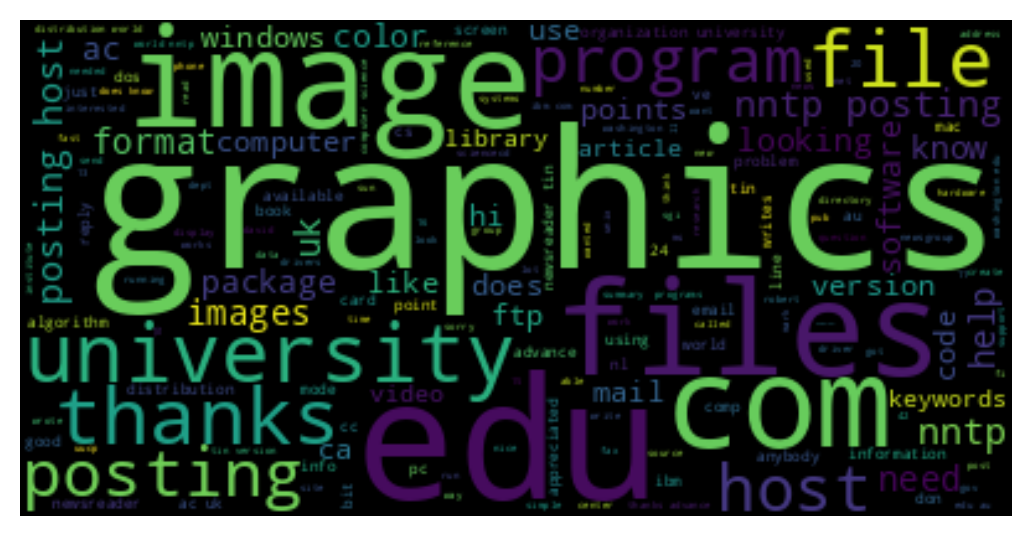

2


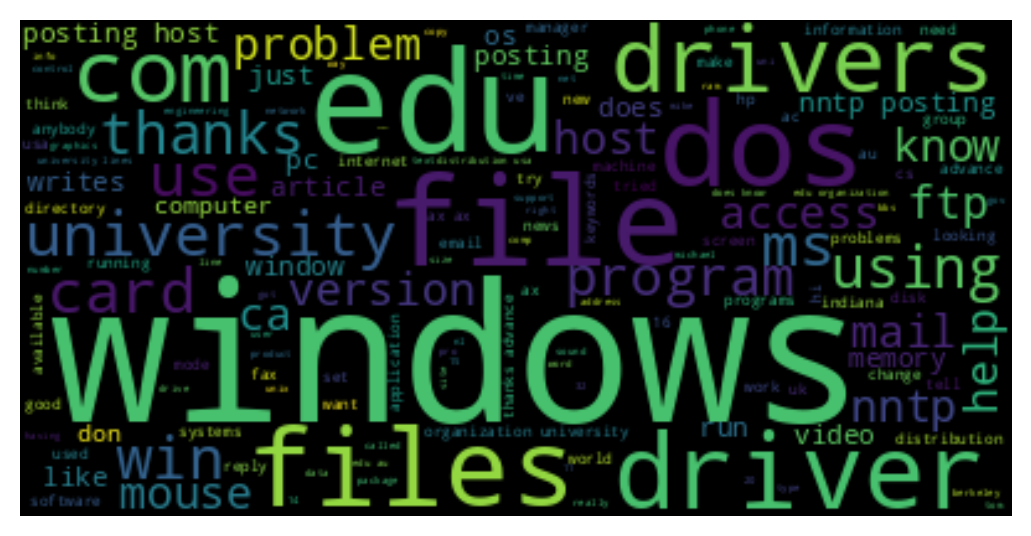

8


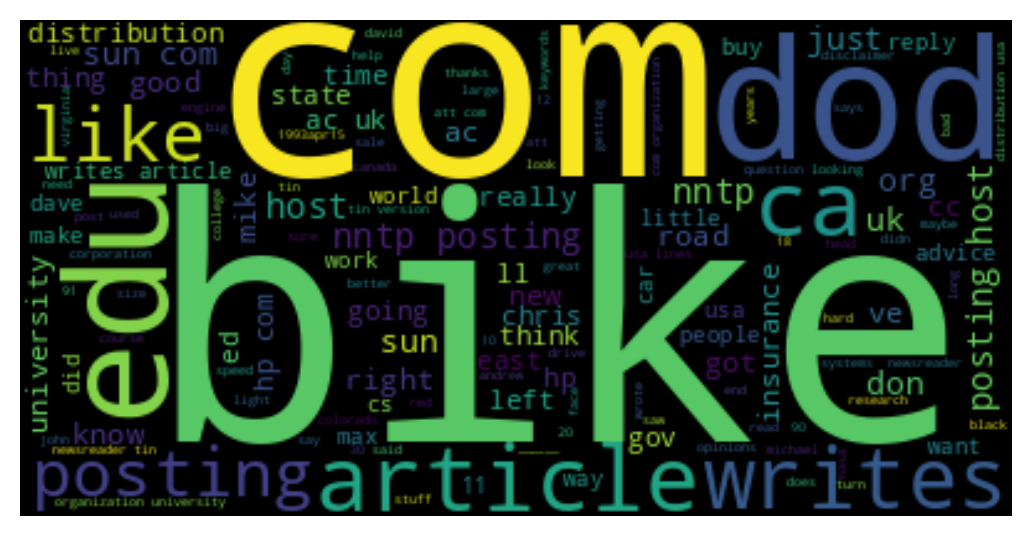

9


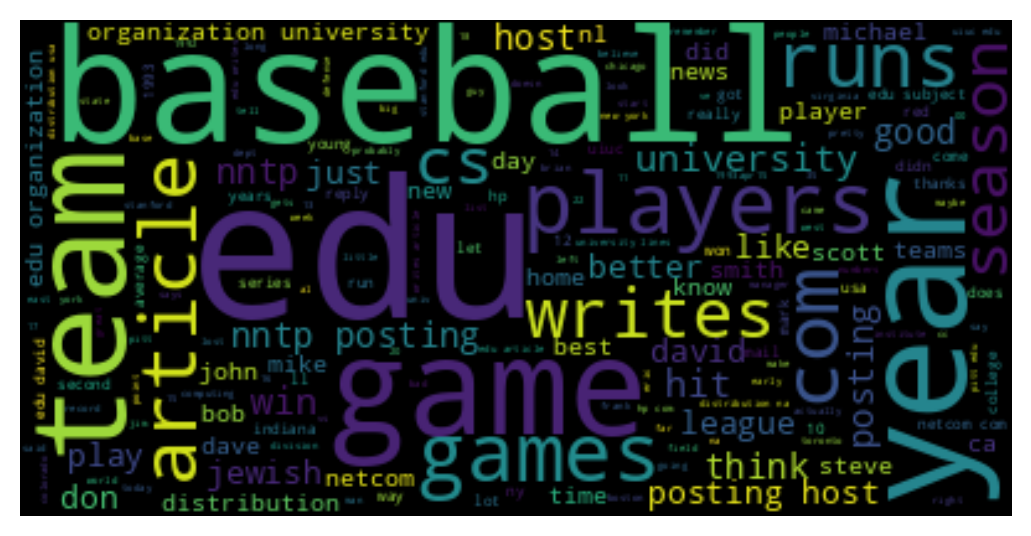

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]:
    slicer = df['topic'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict)
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Feature Selection
For supervised learning tasks, a decent “rule of thumb” is to build a vocabulary of 60K, then use feature selection to get down to 10K.

In [67]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['text'])
X_hash

<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

In [68]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['topic']==1
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['friend',
 'pub',
 'file',
 'cmu edu',
 'form',
 'image',
 'away',
 'avoid',
 'ii',
 'government']

In [69]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [70]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['version',
 'cmu edu',
 'thanks',
 'points',
 'file',
 'level',
 'form',
 'ii',
 'image',
 'government']

In [71]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['algorithm',
 'info',
 'use',
 'digex',
 'file',
 'close',
 'image',
 'figure',
 'ii',
 'government']

### Topic modelling

We use as an example the **20 Newsgroups** ([[http://qwone.com/~jason/20Newsgroups/]]) dataset (from `sklearn`), a collection of about 20,000 newsgroup (message forum) documents.

In [72]:
W=data.data

In [73]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.add('edu')

Pre-processing

In [74]:
from gensim.utils import simple_preprocess

doc_clean = []
# iterate over rows
for i, text in enumerate(W):
    document = simple_preprocess(text) # get sentences/tokens
    document = [word for word in document if word not in stopwords] # remove stopwords
    doc_clean.append(document) # add to list
    if i > 100:
        break

In [75]:
# shuffle the documents
from random import shuffle
shuffle(doc_clean)

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

In [76]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

TF-IDF matrix

In [77]:
from gensim.models import TfidfModel
tfidf = TfidfModel(doc_term_matrix)  # fit model

In [78]:
vector = tfidf[doc_term_matrix[0]]  # apply model to the first corpus document
vector

[(0, 0.11697159995752093),
 (1, 0.03899053331917365),
 (2, 0.0331470009721106),
 (3, 0.11697159995752093),
 (4, 0.02972875367732764),
 (5, 0.02388522133026459),
 (6, 0.11697159995752093),
 (7, 0.02972875367732764),
 (8, 0.03899053331917365),
 (9, 0.054606937250095106),
 (10, 0.050844542778289745),
 (11, 0.19495266659586824),
 (12, 0.027303468625047553),
 (13, 0.0331470009721106),
 (14, 0.03899053331917365),
 (15, 0.0662940019442212),
 (16, 0.0331470009721106),
 (17, 0.03899053331917365),
 (18, 0.09554088532105837),
 (19, 0.0331470009721106),
 (20, 0.03899053331917365),
 (21, 0.11697159995752093),
 (22, 0.0779810666383473),
 (23, 0.016742131675380332),
 (24, 0.0331470009721106),
 (25, 0.02972875367732764),
 (26, 0.03899053331917365),
 (27, 0.0331470009721106),
 (28, 0.050844542778289745),
 (29, 0.0779810666383473),
 (30, 0.03899053331917365),
 (31, 0.01736689412785931),
 (32, 0.02972875367732764),
 (33, 0.0779810666383473),
 (34, 0.0331470009721106),
 (35, 0.03899053331917365),
 (36, 0.

In [79]:
corpus_tfidf = tfidf[doc_term_matrix]   # apply model to whole corpus


Parameters of LDA

    num_topics
        specify how many topics you would like to extract from the documents

    alpha
        document-topic density
            the greater, the article will be assigned to more topics, vice versa

    eta
        topic-word density
            the greater, each topic will contain more words, vice versa


#### Using the DTM

In [80]:
# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel

lda = LdaModel(doc_term_matrix, num_topics=10,
               id2word = dictionary, passes=3)
lda.show_topics(formatted=False)

[(0,
  [('com', 0.0072081285),
   ('rushdie', 0.0066397726),
   ('fatwa', 0.0055111605),
   ('islamic', 0.005431313),
   ('law', 0.0049073696),
   ('book', 0.004866439),
   ('subject', 0.004090509),
   ('lines', 0.004066973),
   ('organization', 0.0036310174),
   ('posting', 0.0035657855)]),
 (1,
  [('lines', 0.006712612),
   ('organization', 0.006110025),
   ('subject', 0.0059504225),
   ('know', 0.005459405),
   ('posting', 0.005056173),
   ('host', 0.0046174456),
   ('nntp', 0.004596889),
   ('think', 0.0039762426),
   ('like', 0.0038023181),
   ('problem', 0.0033324638)]),
 (2,
  [('water', 0.004872468),
   ('may', 0.0045015668),
   ('plants', 0.004466188),
   ('moral', 0.0043989257),
   ('one', 0.0043708556),
   ('subject', 0.0043305885),
   ('nuclear', 0.0040193726),
   ('lines', 0.003941239),
   ('parent', 0.0038913453),
   ('david', 0.003456878)]),
 (3,
  [('scsi', 0.0138172675),
   ('mb', 0.007678719),
   ('com', 0.0049000653),
   ('windows', 0.0047174674),
   ('year', 0.00433

In [81]:
lda_idf = LdaModel(corpus_tfidf, num_topics=10,
               id2word = dictionary, passes=3)
lda_idf.show_topics(formatted=False)

[(0,
  [('suresh', 0.0011033166),
   ('virginia', 0.00093187386),
   ('harris', 0.00088291266),
   ('ericsson', 0.000753845),
   ('systems', 0.0007140046),
   ('scsi', 0.0007121169),
   ('weitek', 0.0007007807),
   ('nodine', 0.00064209825),
   ('drives', 0.0006420864),
   ('trial', 0.0006408238)]),
 (1,
  [('tis', 0.0012153301),
   ('ini', 0.0009042667),
   ('weapons', 0.00085745205),
   ('western', 0.00084008614),
   ('movies', 0.00081762206),
   ('eliot', 0.0007568661),
   ('engr', 0.00073745736),
   ('gear', 0.0007273309),
   ('hammerl', 0.00071793486),
   ('updating', 0.00071461586)]),
 (2,
  [('scsi', 0.0012441819),
   ('ncube', 0.0010823779),
   ('sabbath', 0.00094278326),
   ('blakey', 0.00088896154),
   ('purchased', 0.0008032737),
   ('hijaak', 0.00079870556),
   ('armenian', 0.0007656754),
   ('stratus', 0.000748839),
   ('mb', 0.00071729644),
   ('crypto', 0.00071322825)]),
 (3,
  [('starters', 0.0009780385),
   ('captain', 0.00081180636),
   ('traded', 0.0007986131),
   ('

In [82]:
# to get the topic proportions for a document, use
# the corresponding row from the document-term matrix.
lda[doc_term_matrix[0]]

[(3, 0.9976245)]

The wordcloud package builds a visual representation of most common words. We apply it by topic here

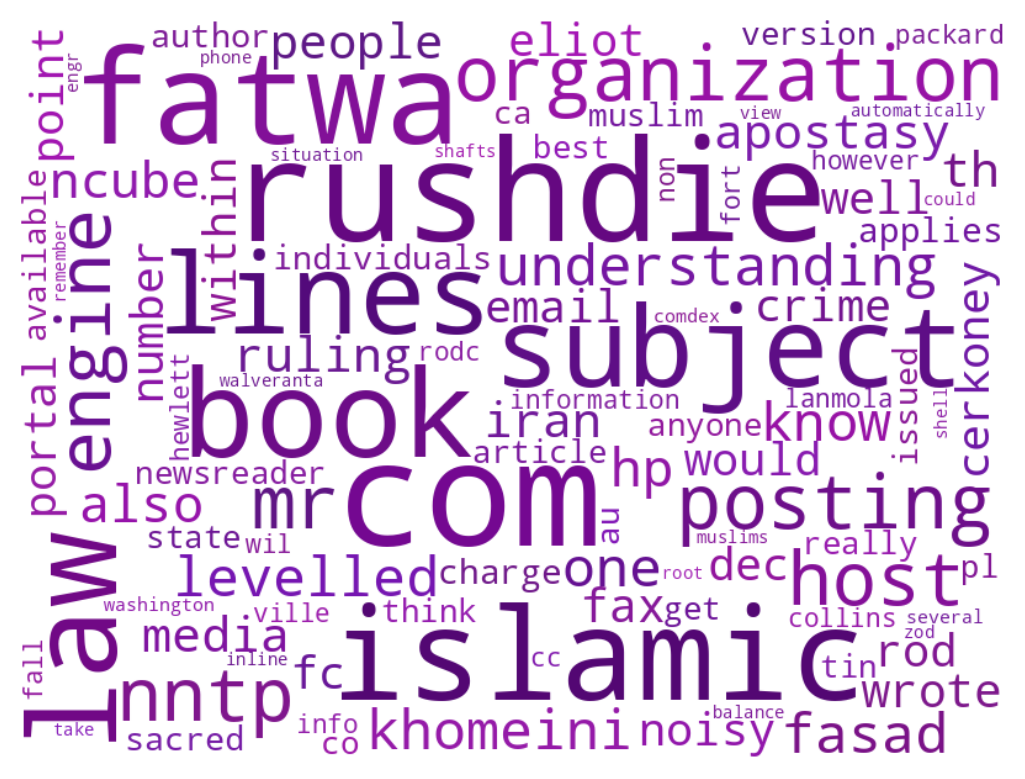

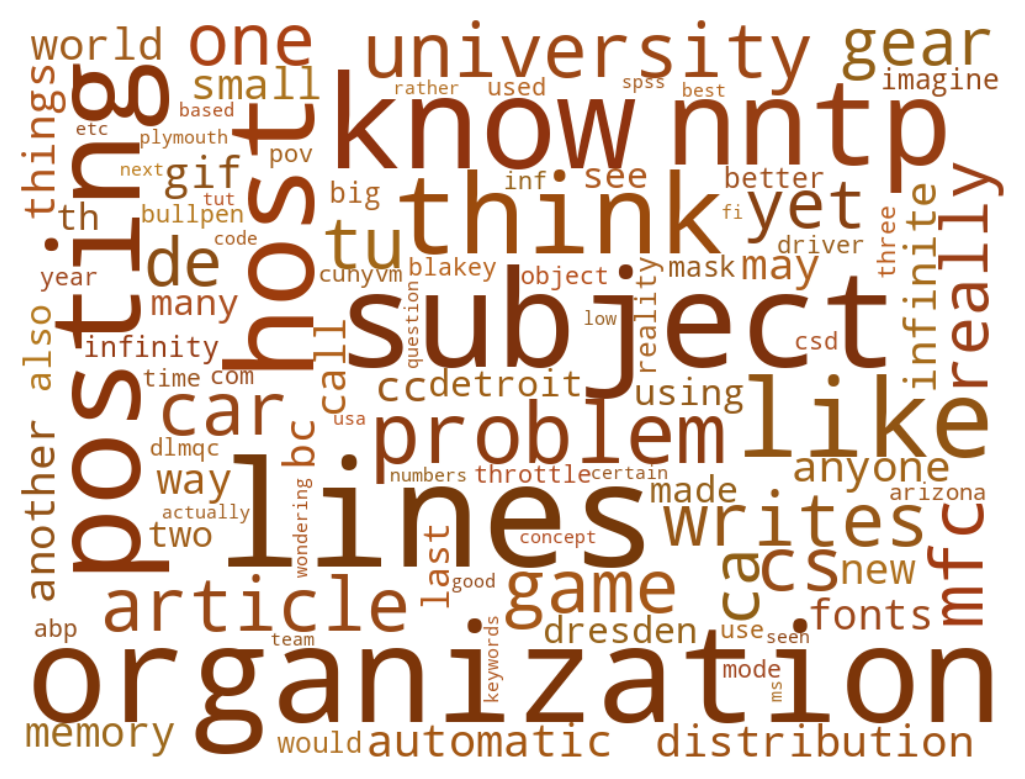

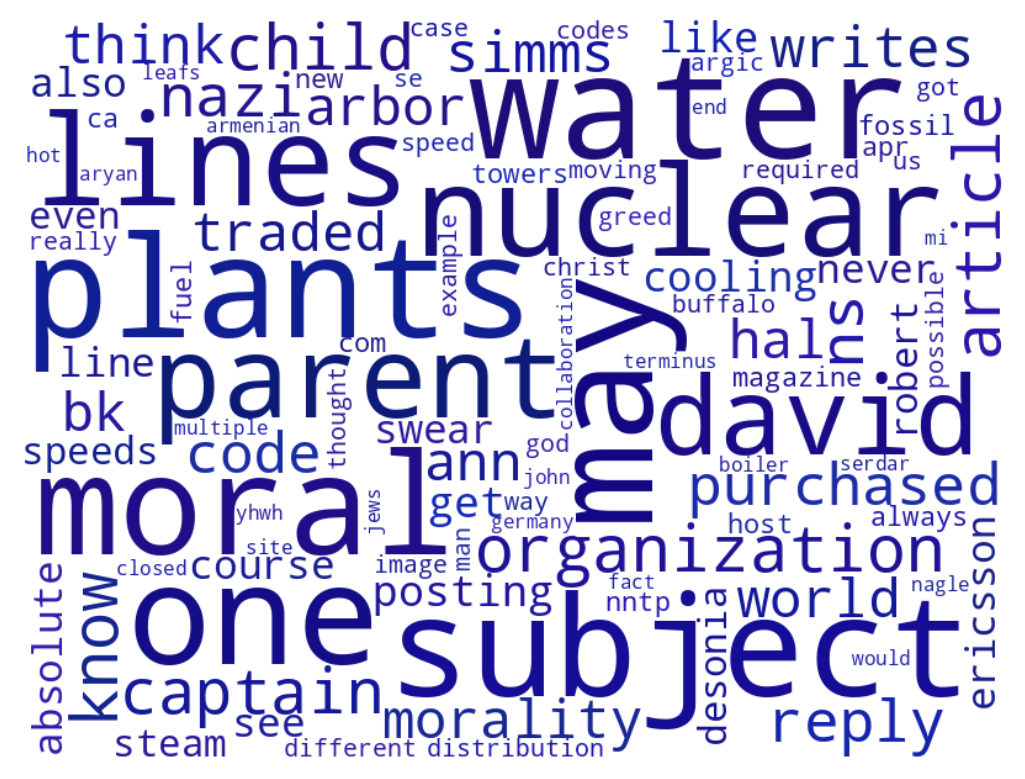

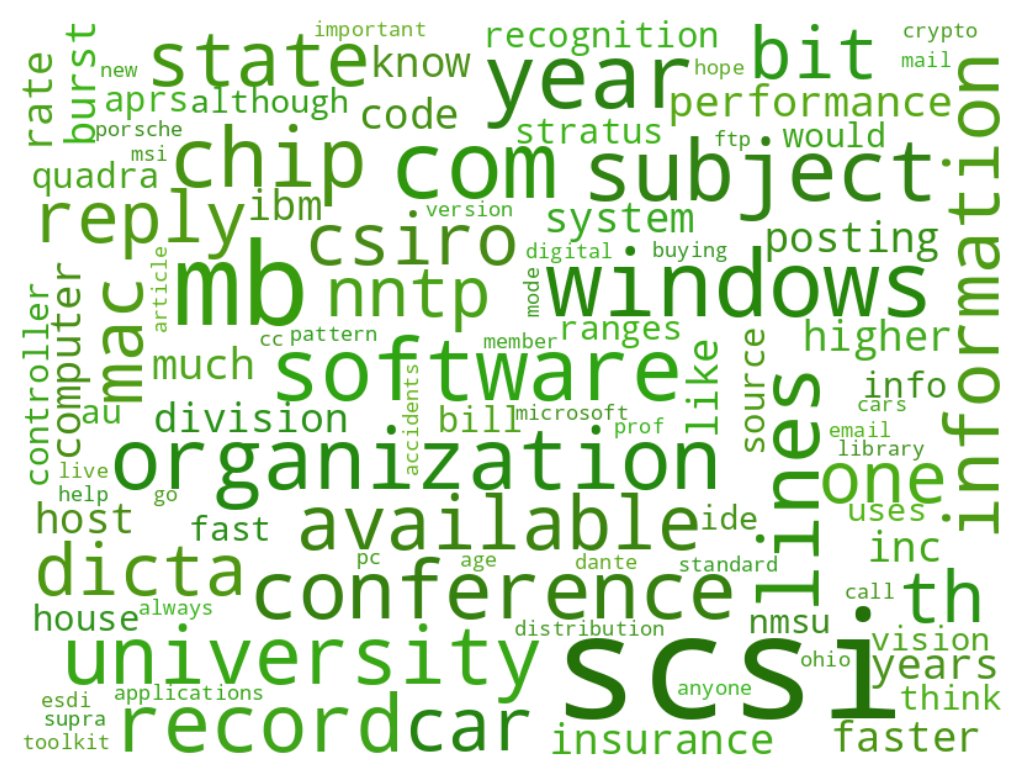

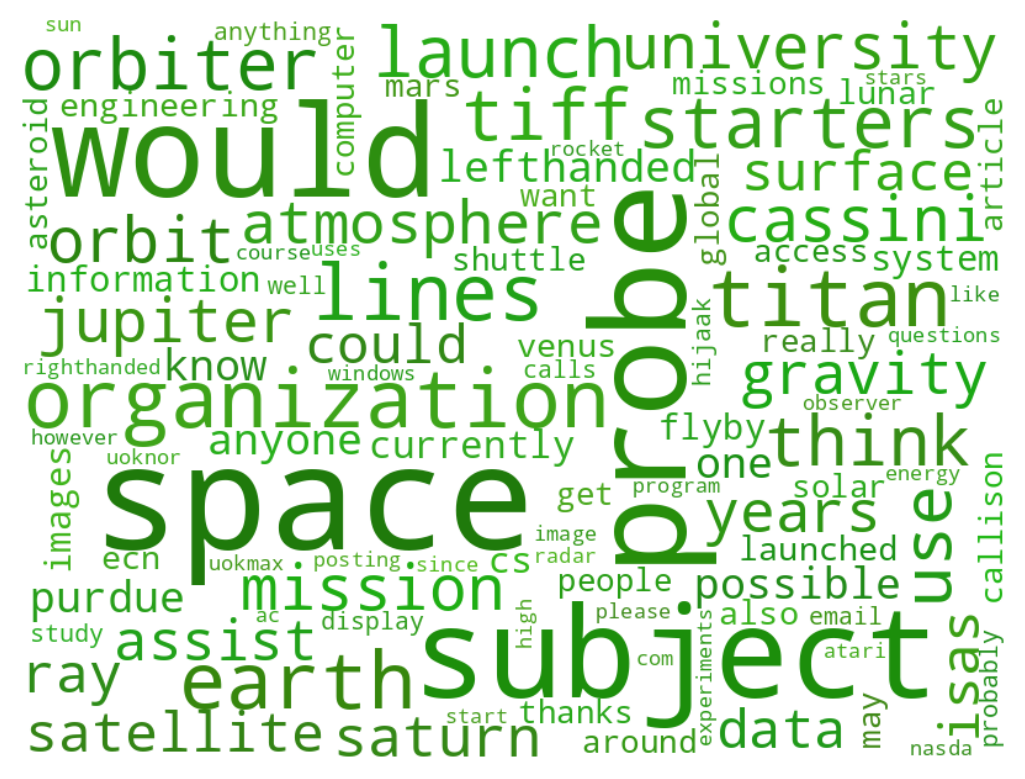

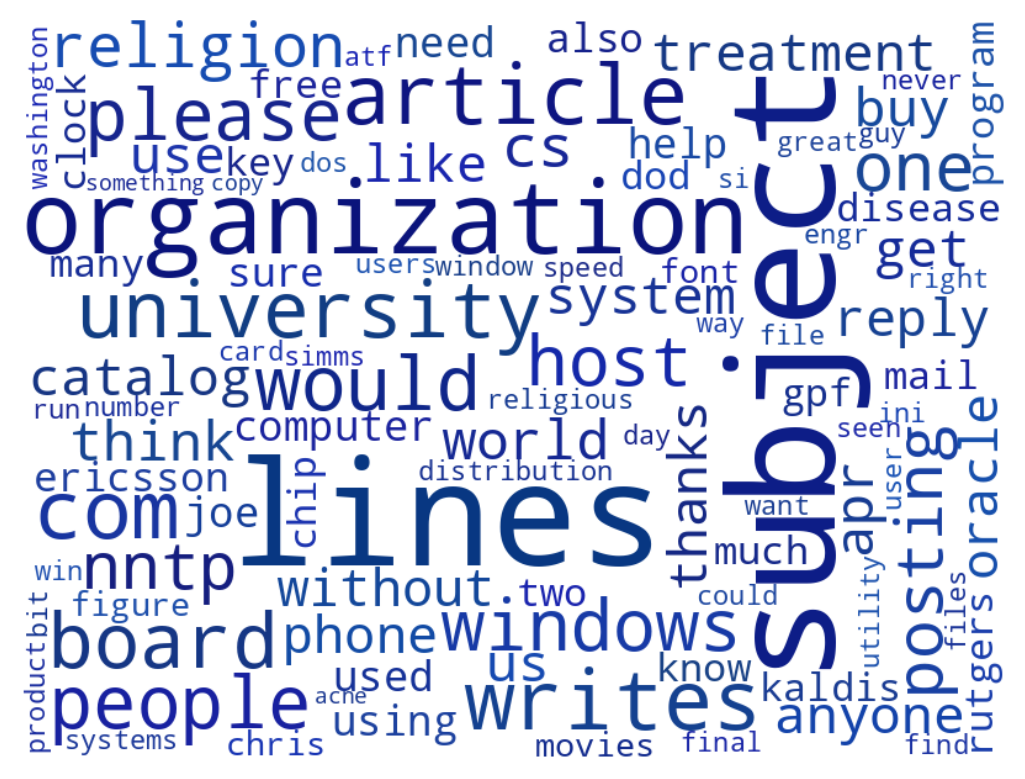

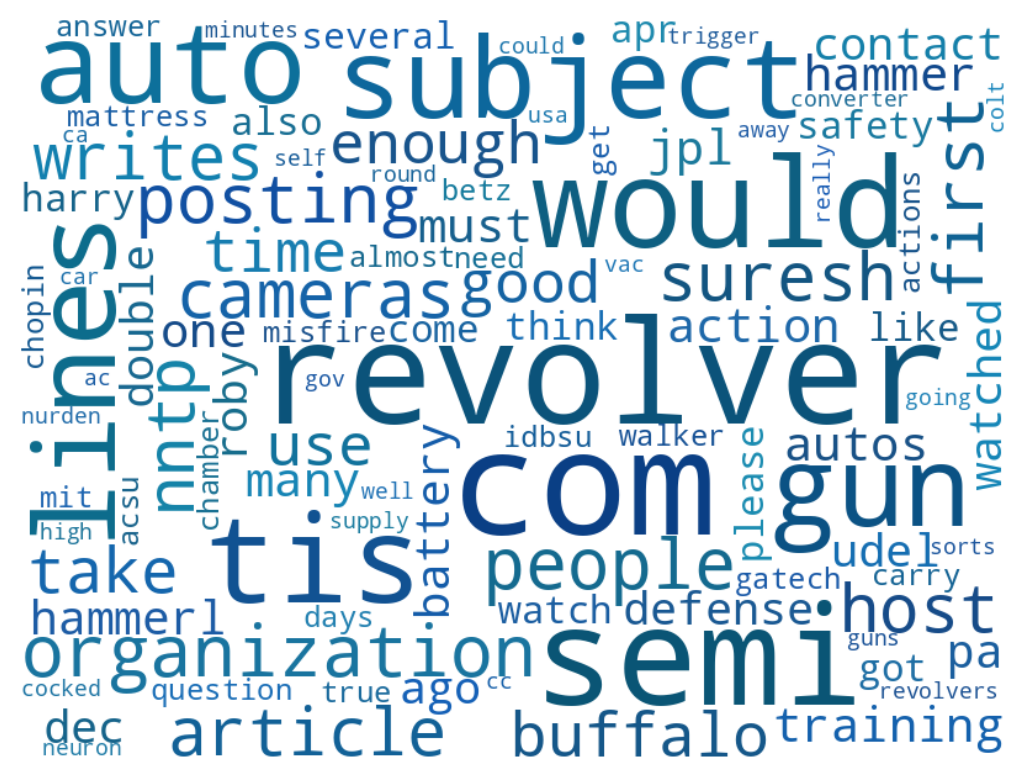

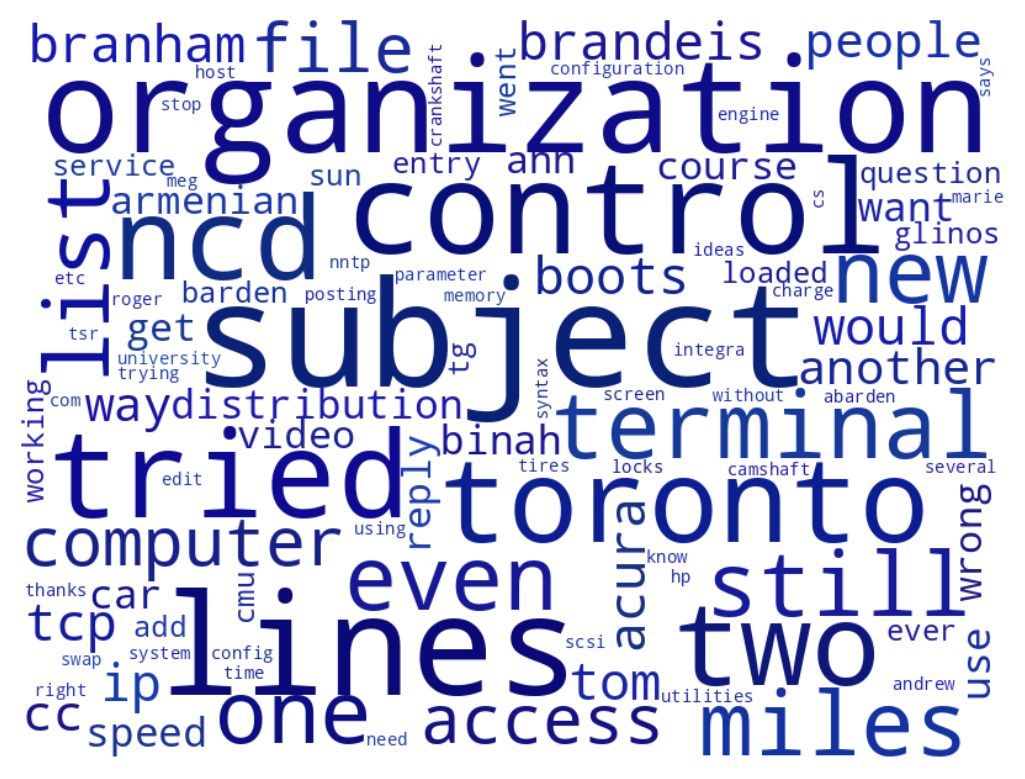

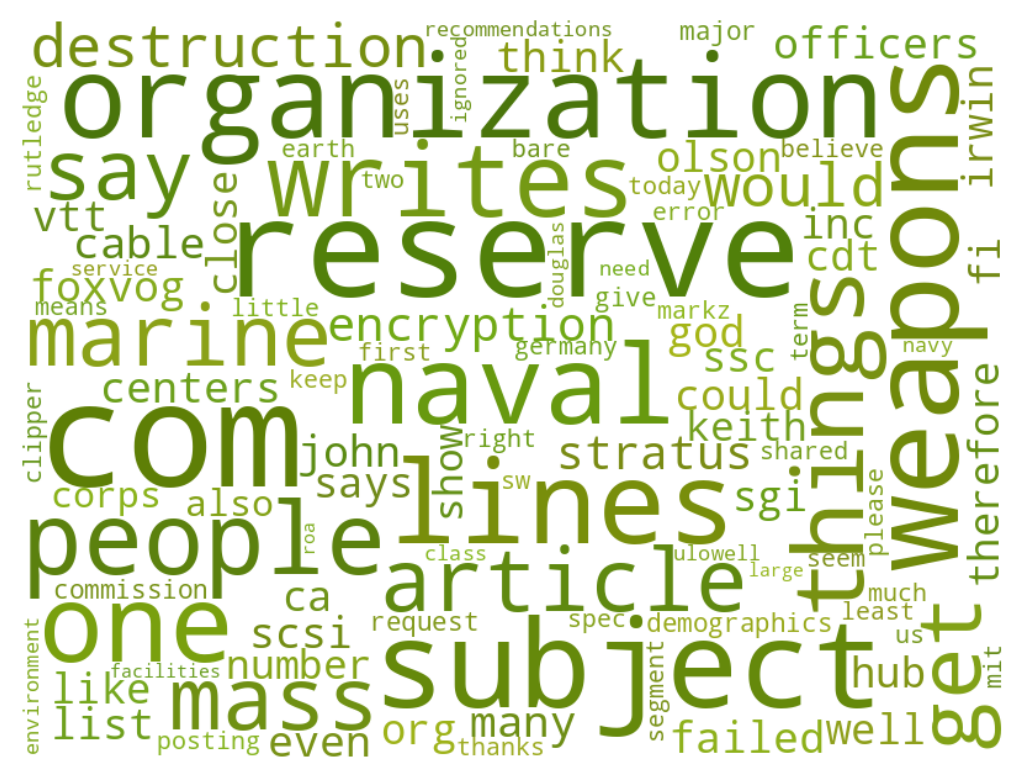

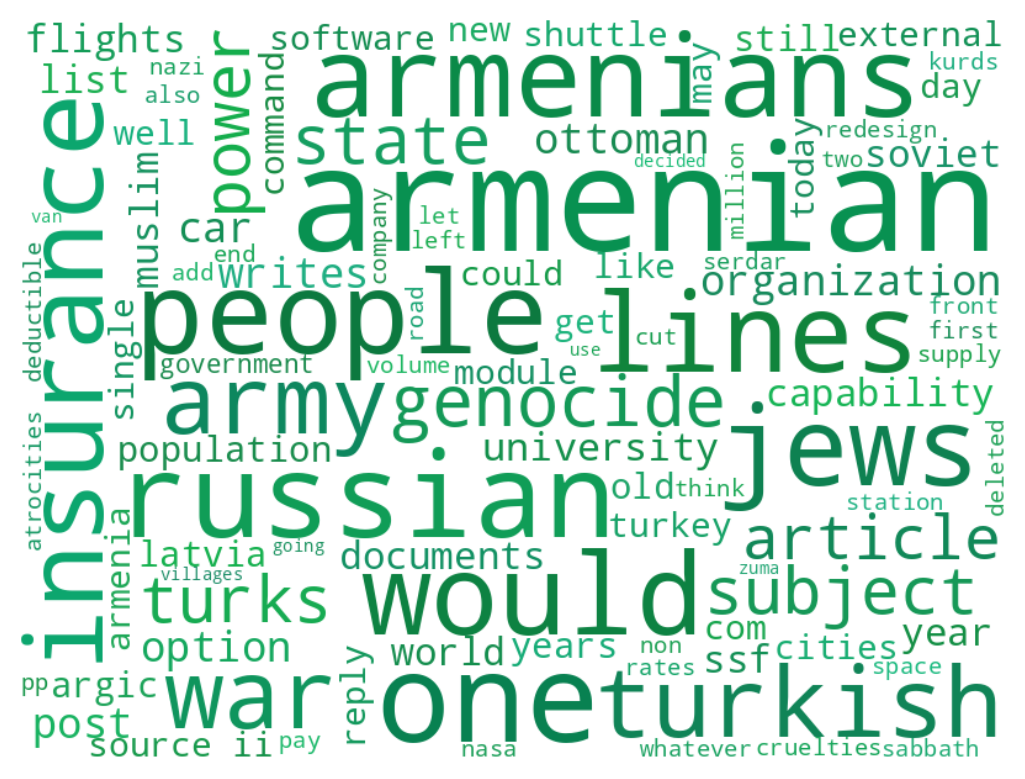

In [83]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):

    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None,
                  position=None, orientation=None,
                  font_path=None, random_state=None):
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)


    wordcloud = WordCloud(background_color="white",
                          ranks_only=False,
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

**LDAvis viz**

## Word Embeddings

In [84]:
###
# Word2Vec in gensim
###

# word2vec requires sentences as input
sentences = []
for doc in df['text']:
    sentences += [simple_preprocess(doc)]
from random import shuffle
shuffle(sentences) # stream in sentences in random order

# train the model
from gensim.models import Word2Vec
w2v = Word2Vec(sentences,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               vector_size=300,  # Word vector dimensionality
               min_count =  25, # Minimum word count
               window = 5, # Context window size
               sample = 1e-3, # Downsample setting for frequent words
               )

# done training, so delete context vectors
w2v.init_sims(replace=True)

w2v.save('w2v-vectors.pkl')

In [85]:
w2v.wv.most_similar('man') # most similar words

[('himself', 0.7268550992012024),
 ('woman', 0.7055094242095947),
 ('christ', 0.6849321126937866),
 ('satan', 0.6654698252677917),
 ('spirit', 0.6594833135604858),
 ('son', 0.6548879146575928),
 ('jesus', 0.6361280679702759),
 ('father', 0.6217045783996582),
 ('lord', 0.6194018125534058),
 ('person', 0.6120415329933167)]

In [86]:
# analogies: judge is to man as __ is to woman
w2v.wv.most_similar(positive=['judge','man'],
                 negative=['woman'])

[('obey', 0.6125483512878418),
 ('pray', 0.595017671585083),
 ('god', 0.5766558647155762),
 ('accept', 0.5637739300727844),
 ('choose', 0.5491892695426941),
 ('praise', 0.5480572581291199),
 ('bless', 0.5444247126579285),
 ('lord', 0.5430565476417542),
 ('interpret', 0.539860725402832),
 ('himself', 0.5359137058258057)]

In [87]:
# Word2Vec: K-Means Clusters
from sklearn.cluster import KMeans
kmw = KMeans(n_clusters=50)
kmw.fit(w2v.wv.vectors)

KMeans(n_clusters=50)

In [88]:
#clust = kmw.labels_[w2v.wv.vocab['woman'].index]
#for i, cluster in enumerate(kmw.labels_):
#    if cluster == clust:
#        print(w2v.wv.index2word[i])
#    if i > 1000:
#        break

## Document Embeddings

In [89]:
###
# Make document vectors from word embeddings
##

# Continuous bag-of-words representation
from gensim.models import Word2Vec
w2v = Word2Vec.load('w2v-vectors.pkl')

sentvecs = []
for sentence in sentences:
    vecs = [w2v.wv[w] for w in sentence if w in w2v.wv]
    if len(vecs)== 0:
        sentvecs.append(np.nan)
        continue
    sentvec = np.mean(vecs,axis=0)
    sentvecs.append(sentvec.reshape(1,-1))
sentvecs[0][0][:30]

array([ 0.00414029, -0.02549687, -0.02116587, -0.01035924,  0.01640678,
       -0.03265009, -0.02417083, -0.00531918, -0.01395744,  0.01054688,
        0.01399988, -0.01338133, -0.00045812,  0.01274749, -0.0143228 ,
        0.00724766,  0.00739968, -0.01108393,  0.00709329, -0.0357901 ,
        0.00014251,  0.01920011, -0.01735628, -0.01480054,  0.00797917,
       -0.02844607,  0.0058458 ,  0.00478549,  0.02105427, -0.0117076 ],
      dtype=float32)

In [90]:
# compute cosine similarity between sentence vectors
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(sentvecs[0],
                  sentvecs[1])[0][0]

0.8208286

In [91]:
sentvecs[0]

array([[ 4.14028578e-03, -2.54968740e-02, -2.11658720e-02,
        -1.03592360e-02,  1.64067801e-02, -3.26500908e-02,
        -2.41708253e-02, -5.31917578e-03, -1.39574362e-02,
         1.05468808e-02,  1.39998766e-02, -1.33813340e-02,
        -4.58118360e-04,  1.27474926e-02, -1.43228024e-02,
         7.24766357e-03,  7.39968196e-03, -1.10839307e-02,
         7.09328940e-03, -3.57901007e-02,  1.42513978e-04,
         1.92001089e-02, -1.73562765e-02, -1.48005392e-02,
         7.97917042e-03, -2.84460653e-02,  5.84579958e-03,
         4.78548650e-03,  2.10542679e-02, -1.17076039e-02,
         1.59901325e-02,  1.12652294e-02,  8.96601286e-03,
         8.04406498e-03, -1.12452386e-02, -1.42253386e-02,
         2.08659731e-02,  1.12923598e-02,  1.42790331e-02,
         1.37883695e-02,  1.85227972e-02,  1.13470750e-02,
         1.27883600e-02,  2.60298047e-02,  1.65037625e-02,
        -8.58982839e-03,  1.73307192e-02,  2.33440902e-02,
        -1.24161066e-02, -3.87497433e-02, -4.31127301e-0

In [92]:
###
# Doc2Vec
###

from nltk import word_tokenize
docs = []

for i, row in df.iterrows():
    docs += [word_tokenize(row['text'])]
shuffle(docs)

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
doc_iterator = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
d2v = Doc2Vec(doc_iterator,
                min_count=10, # minimum word count
                window=10,    # window size
                vector_size=200, # size of document vector
                sample=1e-4,
                negative=5,
                workers=4, # threads
                #dbow_words = 1 # uncomment to get word vectors too
                max_vocab_size=1000) # max vocab size

In [ ]:
d2v.save('d2v-vectors.pkl')

In [ ]:
# matrix of all document vectors:
D = d2v.docvecs.vectors
D.shape

In [ ]:
D

In [ ]:
# infer vectors for new documents
d2v.infer_vector(['the judge on the court'])[:20]

In [ ]:
# get all pair-wise document similarities
pairwise_sims = cosine_similarity(D)
pairwise_sims.shape

In [ ]:
pairwise_sims[:3,:3]

In [ ]:
# Document clusters
from sklearn.cluster import KMeans

# create 50 clusters of similar documents
num_clusters = 10
kmw = KMeans(n_clusters=num_clusters)
kmw.fit(D)

In [ ]:
# Documents from an example cluster
for i, doc in enumerate(docs):
    if kmw.labels_[i] == 3:
        print(doc[10:20])
    if i == 20000:
        break

In [ ]:
# t-SNE for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
d2v_tsne = tsne.fit_transform(D)

In [ ]:
vdf = pd.DataFrame(d2v_tsne,
                  columns=['x-tsne', 'y-tsne'])
vdf['cluster'] = kmw.labels_

In [ ]:
import seaborn as sns
vdf = pd.DataFrame(d2v_tsne,
                  columns=['x', 'y'])
vdf['cluster'] = kmw.labels_

chart = sns.scatterplot(data=vdf, x='x', y='y', hue='cluster')